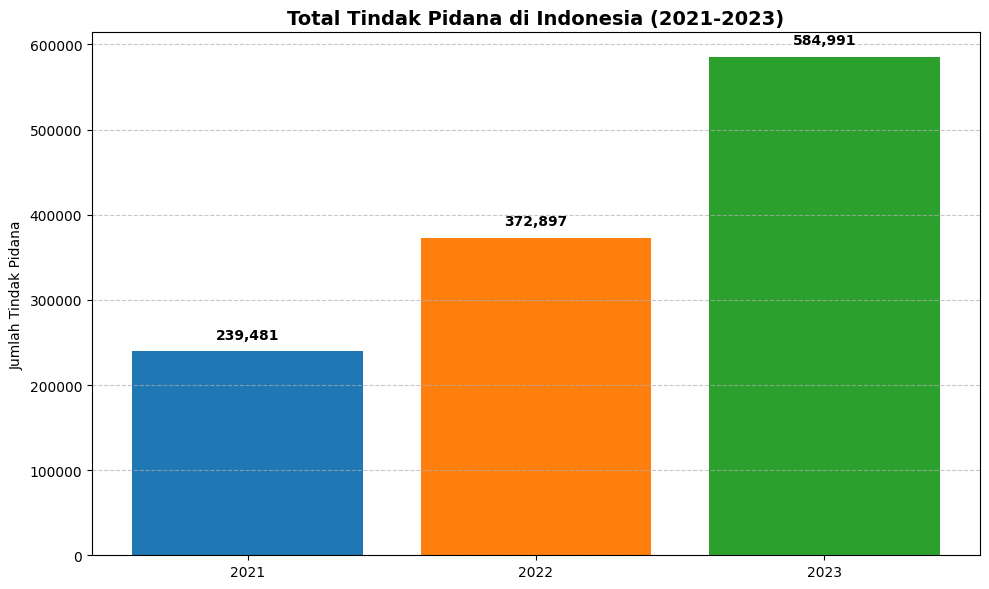

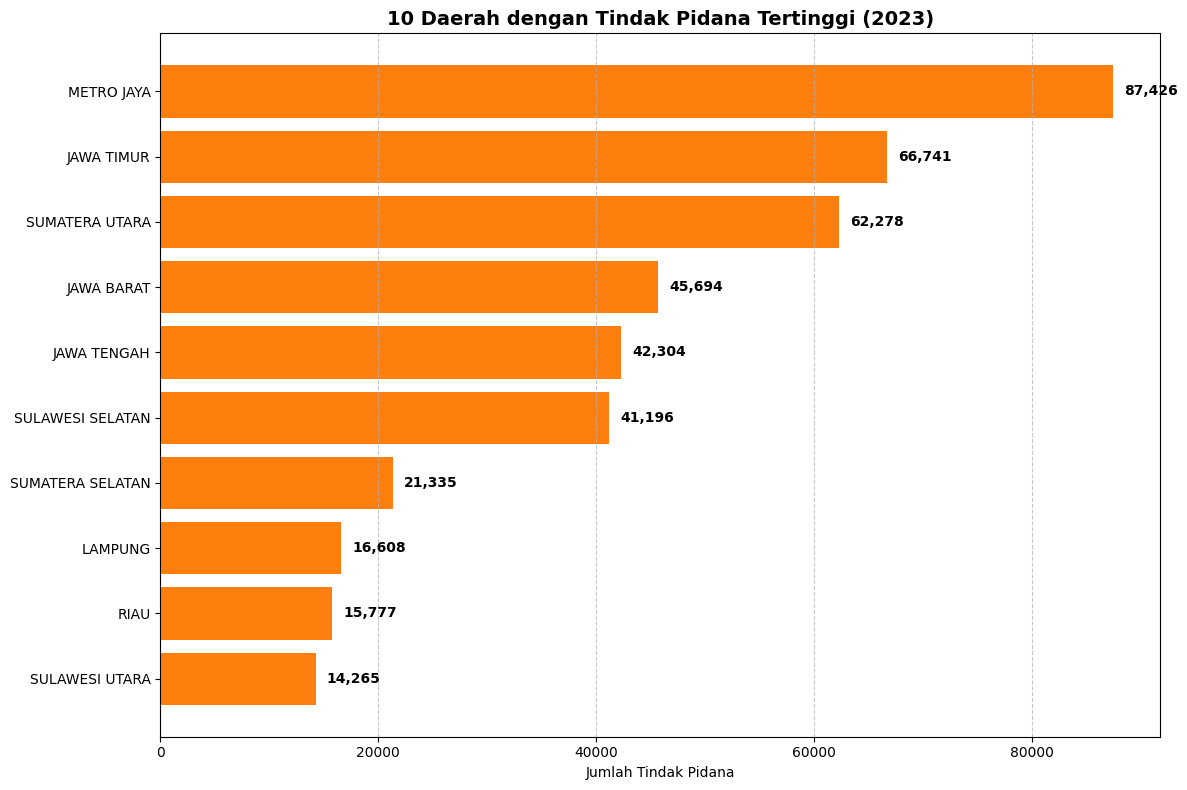

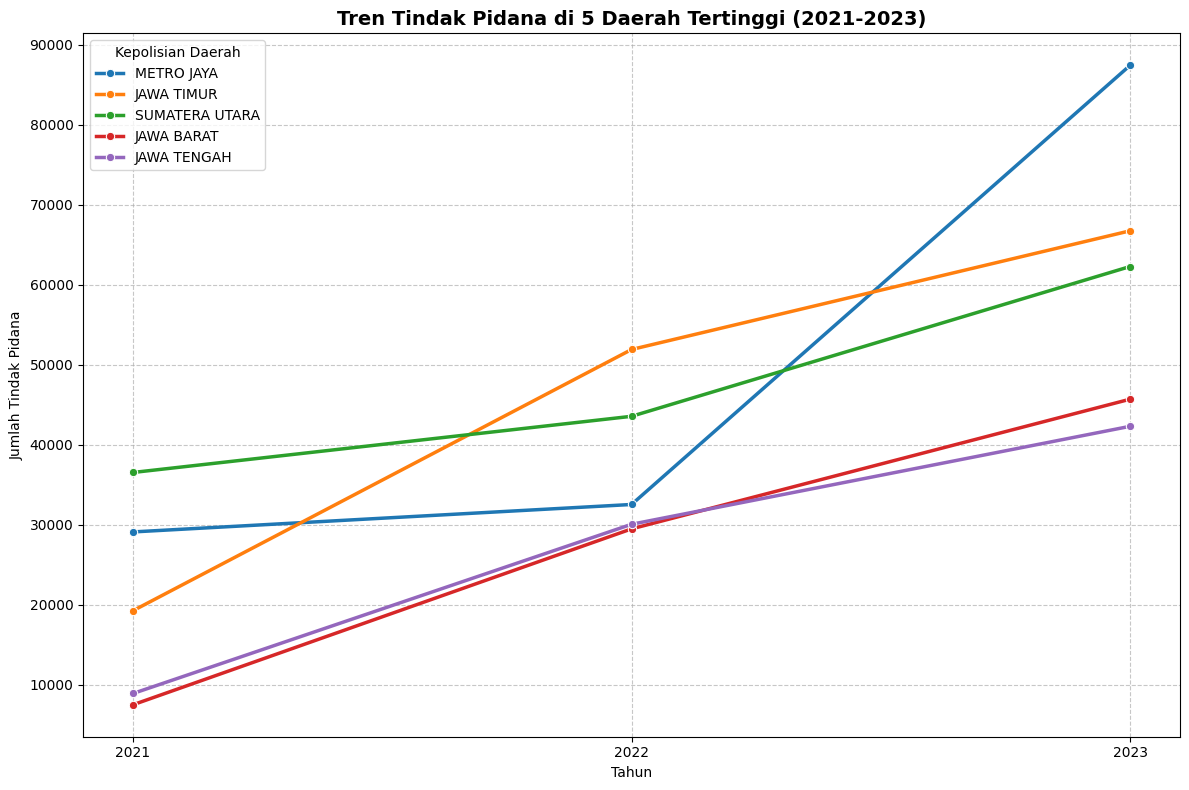

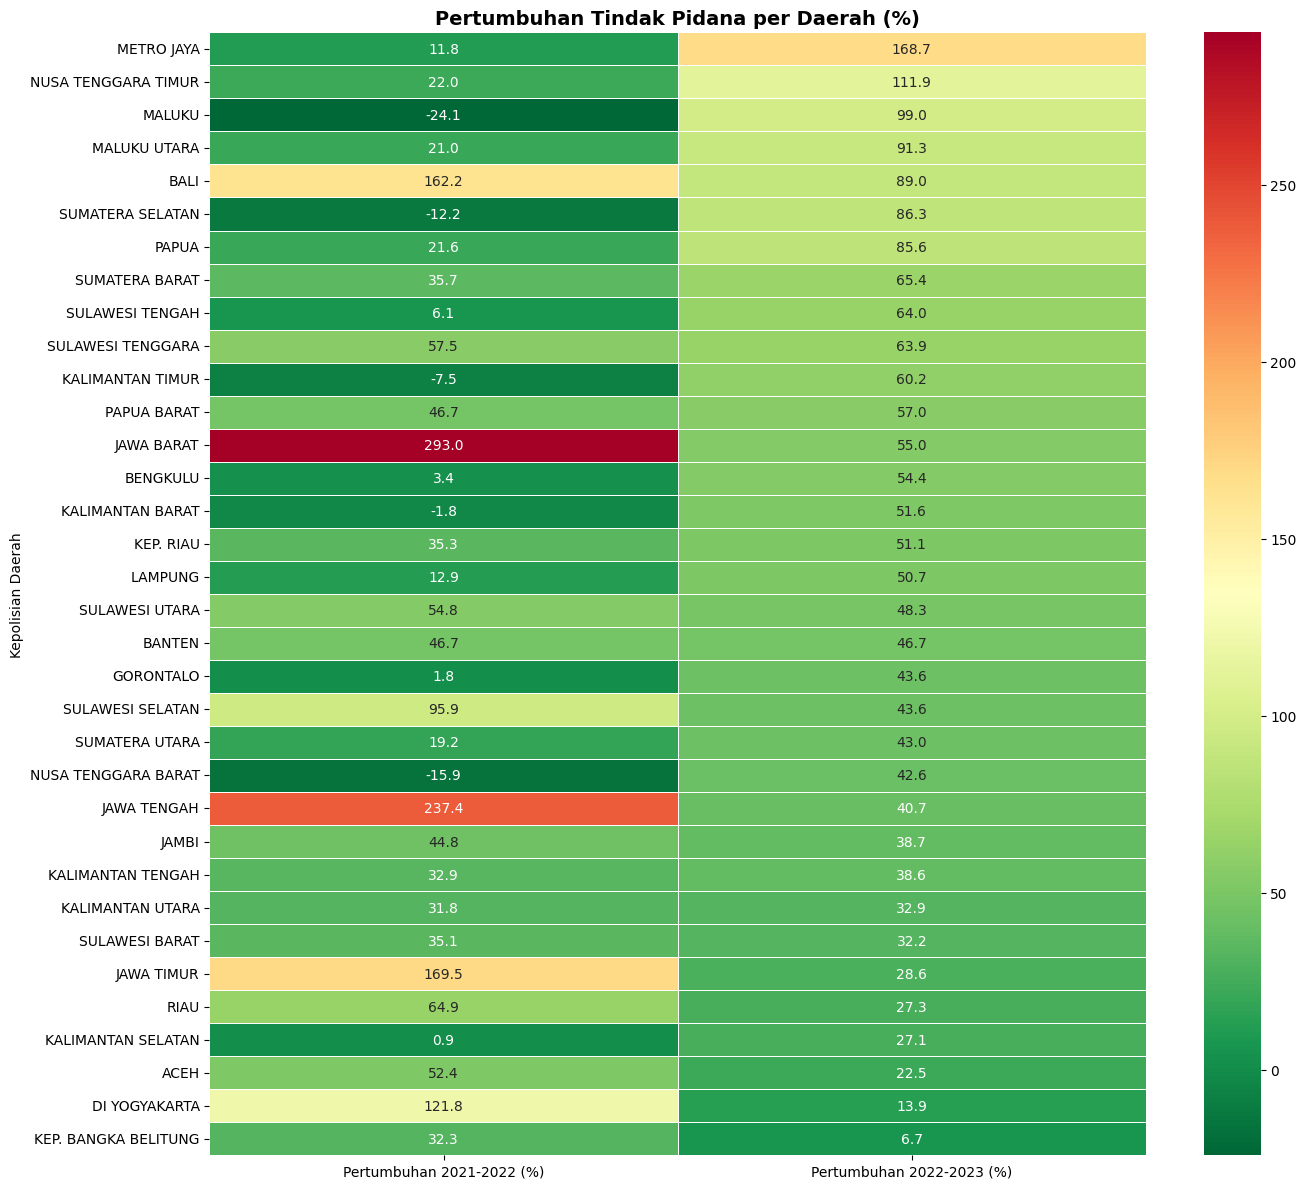

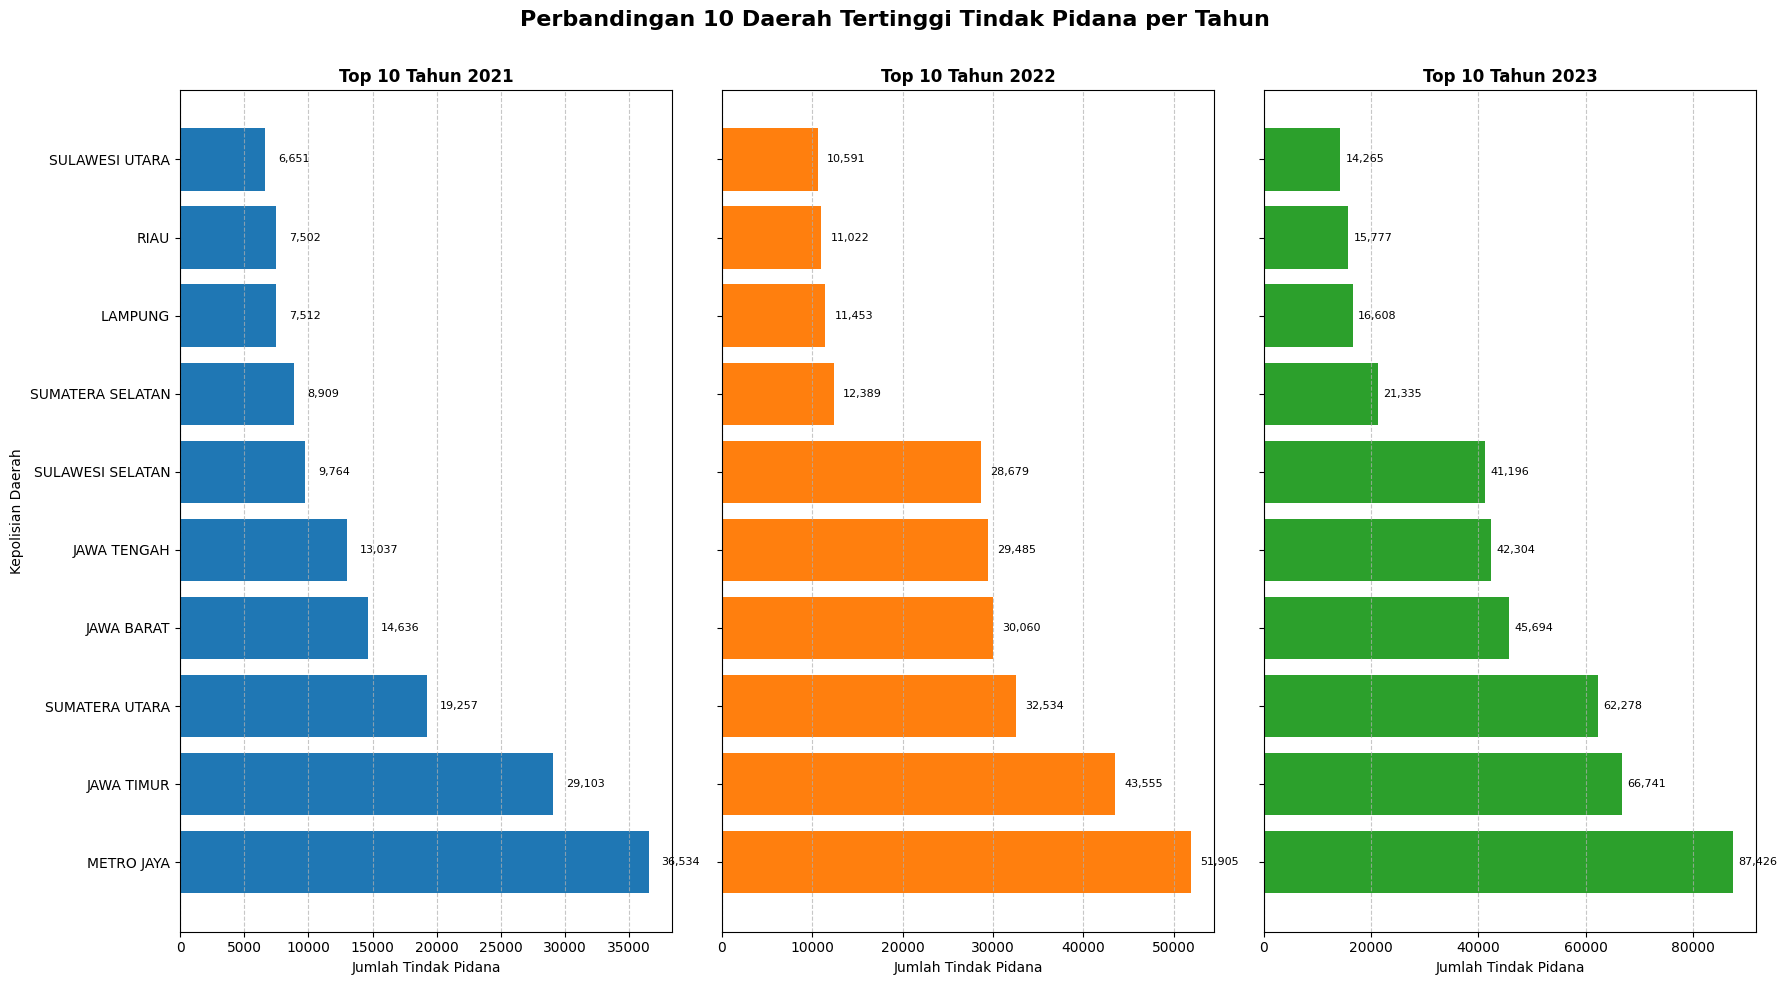

Rangkuman Data Tindak Pidana di Indonesia:
Total tindak pidana 2021: 239,481
Total tindak pidana 2022: 372,897
Total tindak pidana 2023: 584,991
Pertumbuhan 2021-2022: 55.71%
Pertumbuhan 2022-2023: 56.88%

Daerah dengan tindak pidana tertinggi 2023:
METRO JAYA: 87,426
JAWA TIMUR: 66,741
SUMATERA UTARA: 62,278
JAWA BARAT: 45,694
JAWA TENGAH: 42,304
SULAWESI SELATAN: 41,196
SUMATERA SELATAN: 21,335
LAMPUNG: 16,608
RIAU: 15,777
SULAWESI UTARA: 14,265


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membuat data frame dari data tindak pidana
data = {
    'Kepolisian Daerah': [
        'ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI', 
        'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG', 'KEP. RIAU',
        'METRO JAYA', 'JAWA BARAT', 'JAWA TENGAH', 'DI YOGYAKARTA', 'JAWA TIMUR',
        'BANTEN', 'BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT',
        'KALIMANTAN TENGAH', 'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA',
        'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN', 'SULAWESI TENGGARA',
        'GORONTALO', 'SULAWESI BARAT', 'MALUKU', 'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA',
        'INDONESIA'
    ],
    '2021': [
        6651, 36534, 5666, 7512, 3701, 13037, 3493, 9764, 1566, 2481,
        29103, 7502, 8909, 4774, 19257, 3434, 2404, 6296, 4909, 4048,
        2399, 4973, 4564, 971, 6215, 5139, 14636, 2431, 2445, 1500,
        3139, 1008, 2784, 6236, 239481
    ],
    '2022': [
        10137, 43555, 7691, 12389, 5359, 11453, 3613, 11022, 2072, 3358,
        32534, 29485, 30060, 10591, 51905, 5038, 6304, 5296, 5991, 3975,
        3189, 5016, 4221, 1280, 9618, 5453, 28679, 3828, 2488, 2027,
        2383, 1220, 4083, 7584, 372897
    ],
    '2023': [
        12420, 62278, 12722, 15777, 7432, 21335, 5579, 16608, 2211, 5074,
        87426, 45694, 42304, 12061, 66741, 7392, 11916, 7550, 12692, 6028,
        4420, 6375, 6762, 1701, 14265, 8944, 41196, 6276, 3574, 2679,
        4741, 2334, 6410, 14074, 584991
    ]
}

# Membuat dataframe
df = pd.DataFrame(data)

# Menyimpan total Indonesia untuk visualisasi terpisah
indonesia_data = df[df['Kepolisian Daerah'] == 'INDONESIA'].copy()
df_daerah = df[df['Kepolisian Daerah'] != 'INDONESIA'].copy()

# 1. Visualisasi Total Tindak Pidana per Tahun di Indonesia
plt.figure(figsize=(10, 6))
plt.bar(['2021', '2022', '2023'], indonesia_data.iloc[0, 1:4], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Total Tindak Pidana di Indonesia (2021-2023)', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Tindak Pidana')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(indonesia_data.iloc[0, 1:4]):
    plt.text(i, value + 15000, f'{value:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('total_indonesia.png')
plt.show()

# 2. Visualisasi Tindak Pidana per Daerah untuk 2023 (Top 10)
top_10_2023 = df_daerah.sort_values('2023', ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_2023['Kepolisian Daerah'], top_10_2023['2023'], color='#ff7f0e')
plt.title('10 Daerah dengan Tindak Pidana Tertinggi (2023)', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Tindak Pidana')
plt.gca().invert_yaxis()  # Agar daerah dengan nilai tertinggi di atas
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan label nilai
for bar in bars:
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_daerah_2023.png')
plt.show()

# 3. Visualisasi Tren Tindak Pidana per Daerah (Top 5)
top_5_2023 = df_daerah.sort_values('2023', ascending=False).head(5)
top_5_melted = pd.melt(top_5_2023, id_vars=['Kepolisian Daerah'], value_vars=['2021', '2022', '2023'],
                       var_name='Tahun', value_name='Jumlah')

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_melted, x='Tahun', y='Jumlah', hue='Kepolisian Daerah', marker='o', linewidth=2.5)
plt.title('Tren Tindak Pidana di 5 Daerah Tertinggi (2021-2023)', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Tindak Pidana')
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Kepolisian Daerah', loc='upper left')

plt.tight_layout()
plt.savefig('tren_top_5_daerah.png')
plt.show()

# 4. Visualisasi Heatmap untuk semua daerah
df_pivot = df_daerah.set_index('Kepolisian Daerah')
growth_rate = df_pivot.pct_change(axis=1) * 100
growth_rate = growth_rate.iloc[:, 1:]  # Menghilangkan kolom pertama (NaN)
growth_rate.columns = ['Pertumbuhan 2021-2022 (%)', 'Pertumbuhan 2022-2023 (%)']

plt.figure(figsize=(14, 12))
sns.heatmap(growth_rate.sort_values('Pertumbuhan 2022-2023 (%)', ascending=False), 
            cmap='RdYlGn_r', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Pertumbuhan Tindak Pidana per Daerah (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap_pertumbuhan.png')
plt.show()

# 5. Visualisasi Perbandingan 3 Tahun dengan Subplot
# Menyiapkan data untuk plotting dengan subplot
years = ['2021', '2022', '2023']
data_years = [df_daerah['2021'].values, df_daerah['2022'].values, df_daerah['2023'].values]
regions = df_daerah['Kepolisian Daerah'].values

# Membuat subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 10), sharey=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (year, data, ax, color) in enumerate(zip(years, data_years, axes, colors)):
    sorted_indices = np.argsort(data)[::-1]  # Mengurutkan dari yang terbesar
    top_indices = sorted_indices[:10]  # Mengambil 10 teratas
    
    y_pos = np.arange(len(top_indices))
    sorted_data = data[top_indices]
    sorted_regions = regions[top_indices]
    
    ax.barh(y_pos, sorted_data, color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(sorted_regions)
    ax.set_title(f'Top 10 Tahun {year}', fontweight='bold')
    ax.set_xlabel('Jumlah Tindak Pidana')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Menambahkan nilai pada bar
    for j, v in enumerate(sorted_data):
        ax.text(v + 1000, j, f'{int(v):,}', va='center', fontsize=8)
    
    if i == 0:
        ax.set_ylabel('Kepolisian Daerah')

plt.suptitle('Perbandingan 10 Daerah Tertinggi Tindak Pidana per Tahun', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('perbandingan_tahunan.png')
plt.show()

# 6. Visualisasi Peta Choropleth Indonesia (ditambahkan jika ada pustaka tambahan)
# Untuk visualisasi peta, Anda dapat menggunakan library seperti geopandas
# Karena membutuhkan data shapefile Indonesia, ini dibuat sebagai contoh tambahan

# Mencetak rangkuman data
print("Rangkuman Data Tindak Pidana di Indonesia:")
print(f"Total tindak pidana 2021: {indonesia_data['2021'].values[0]:,}")
print(f"Total tindak pidana 2022: {indonesia_data['2022'].values[0]:,}")
print(f"Total tindak pidana 2023: {indonesia_data['2023'].values[0]:,}")
print(f"Pertumbuhan 2021-2022: {(indonesia_data['2022'].values[0]/indonesia_data['2021'].values[0] - 1)*100:.2f}%")
print(f"Pertumbuhan 2022-2023: {(indonesia_data['2023'].values[0]/indonesia_data['2022'].values[0] - 1)*100:.2f}%")
print("\nDaerah dengan tindak pidana tertinggi 2023:")
for i, row in top_10_2023.iterrows():
    print(f"{row['Kepolisian Daerah']}: {row['2023']:,}")